**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Preprocessing**

In [2]:
from os import listdir

weather_df = pd.read_csv('datasets/weather_hourly_helsinki.csv')

weather_headers = weather_df.loc[0:2, :]

weather_df = weather_df.loc[1:, :]
weather_df.columns = weather_df.iloc[0]
weather_df = weather_df.loc[2:, :]

bike_df = pd.DataFrame(columns=['Departure', 'Return', 'Departure station id', 'Departure station name', 'Return station id', 'Return station name', 'Covered distance (m)', 'Duration (sec.)'])

for dataset in listdir('datasets'):
  if dataset == 'weather_hourly_helsinki.csv':
    continue
  temp_df = pd.read_csv('datasets/' + dataset, low_memory=False)
  bike_df = pd.concat([bike_df, temp_df])

bike_df['Departure'] = pd.to_datetime(bike_df['Departure'], format='mixed')
bike_df['Return'] = pd.to_datetime(bike_df['Return'], format='mixed')

/tmp/ipykernel_10189/3749988639.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bike_df = pd.concat([bike_df, temp_df])


**Number of Ongoing Bike Trips At Hourly Interval**

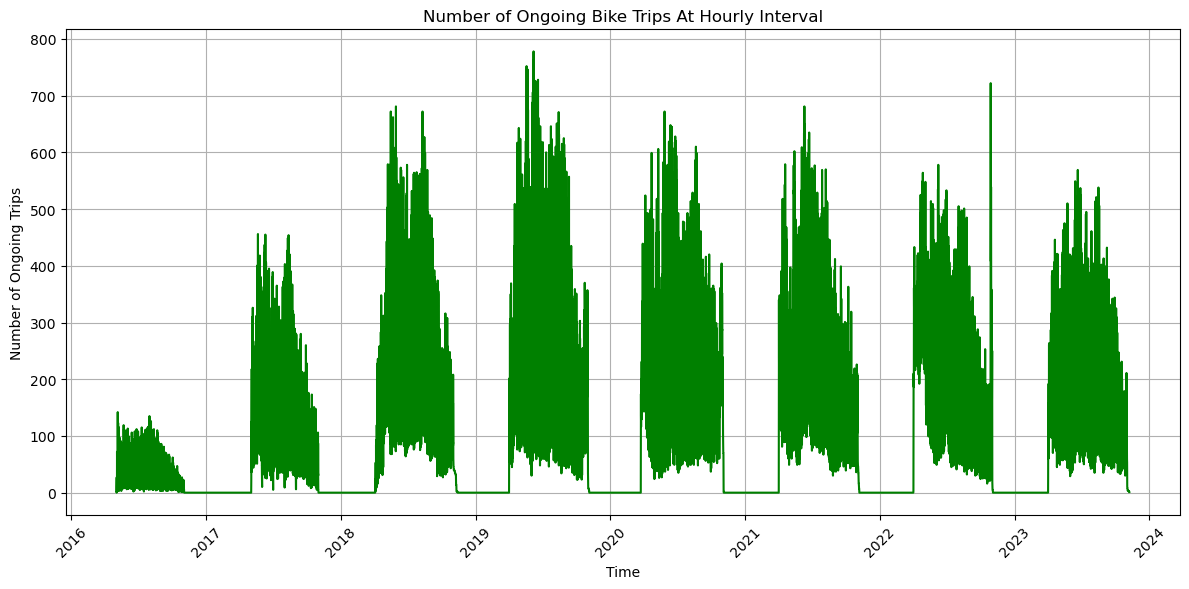

In [3]:
# Count how many trips are ongoing at hourly interval
time_range = pd.date_range(start=bike_df['Departure'].min(), end=bike_df['Return'].max(), freq='H')

ongoing_trips = []

for current_time in time_range:
  count_ongoing = bike_df[(bike_df['Departure'] <= current_time) & (bike_df['Return'] > current_time)].shape[0]
  ongoing_trips.append(count_ongoing)

plt.figure(figsize=(12, 6))
sns.lineplot(x=time_range, y=ongoing_trips, marker=None, color='g')
plt.title('Number of Ongoing Bike Trips At Hourly Interval')
plt.xlabel('Time')
plt.ylabel('Number of Ongoing Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('images/ongoing_bike_trips_chart.png')
plt.show()

**Number of Ongoing Bike Trips at Daily Interval**

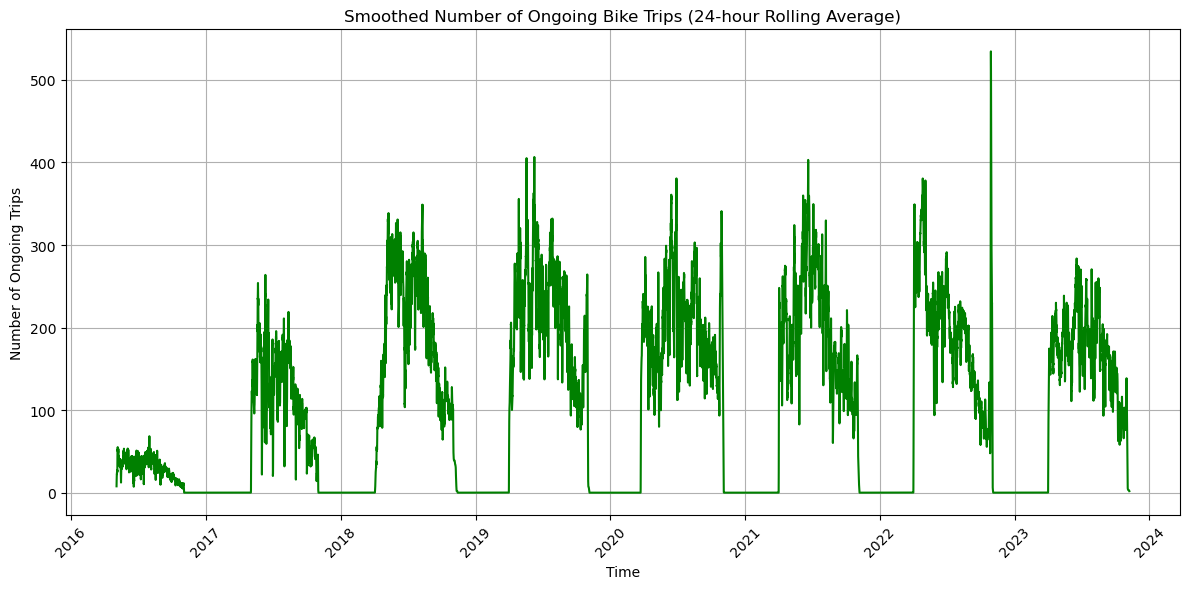

In [4]:
ongoing_trips_series = pd.Series(ongoing_trips, index=time_range)
rolling_avg = ongoing_trips_series.rolling(window=24).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=rolling_avg.index, y=rolling_avg.values, marker=None, color='g')
plt.title('Smoothed Number of Ongoing Bike Trips (24-hour Rolling Average)')
plt.xlabel('Time')
plt.ylabel('Number of Ongoing Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('images/ongoing_bike_trips_chart_smoothed.png')
plt.show()

**Autocorrelation**

<Figure size 1200x600 with 0 Axes>

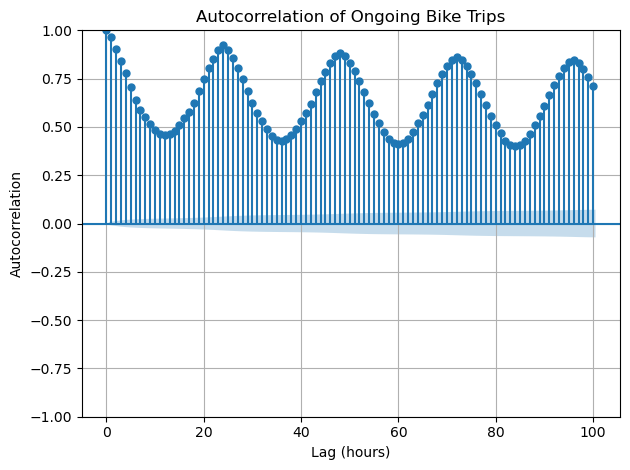

In [5]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 6))
plot_acf(ongoing_trips, lags=100)
plt.title('Autocorrelation of Ongoing Bike Trips')
plt.xlabel('Lag (hours)')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.tight_layout()
plt.savefig('images/autocorrelation.png')
plt.show()